In [1]:
from drn_interactions.io import load_lfp, load_lfp_ts
from scipy.stats import variation, zscore
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd 
import numpy as np

from sklearn.ensemble import IsolationForest
from sklearn.impute import KNNImputer
from scipy.ndimage import gaussian_filter
from sklearn.cluster import KMeans

In [2]:
def plot_spectra(df, k_clusters=2, figsize=(20, 7)):
    df = df.copy()
    _, axes = plt.subplots(ncols=4, figsize=figsize)

    n_clusters = list(range(2, 8))
    error = []
    for k in n_clusters:
        error.append(KMeans(k).fit(df).inertia_)
    axes[1].plot(n_clusters, error, "k-o")

    df["cluster"] = KMeans(k_clusters, random_state=42).fit_predict(df)
    sns.heatmap(df.sort_values("cluster").drop("cluster", axis=1).transpose().iloc[::-1], robust=True, cmap="viridis", ax=axes[2], center=0, vmin=-1, vmax=1)

    dfp = df.melt(id_vars="cluster", var_name="freq", value_name="value").assign(band=lambda x: np.where(x["freq"] < 4, "delta", "theta"))
    sns.barplot(x="band", y="value", hue="cluster", data=dfp, ax=axes[3])

    sns.heatmap(df.transpose().iloc[::-1], robust=True, cmap="viridis", ax=axes[0], center=0)

    return df.reset_index()[["timepoint_s", "cluster"]], dfp


def plot_session(df_fft, session, n_clusters):
    df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
    )
    idx = IsolationForest().fit_predict(df1)
    df1.iloc[idx == -1, :] = np.nan 
    df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)
    df2 = df1.apply(zscore).transpose().apply(zscore).transpose()
    values = gaussian_filter(df2, sigma=(2, 2))
    dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
    dfp, _ = plot_spectra(dfp, k_clusters=n_clusters)
    return dfp


def get_example(df_fft, session):
    df1 = (
    df_fft
    .loc[lambda x: x.frequency < 8]
    .loc[lambda x: x.frequency > 0]
    .loc[lambda x: x.session_name == session].pivot(index="timepoint_s", columns="frequency", values="fft_value")
    )
    idx = IsolationForest().fit_predict(df1)
    df1.iloc[idx == -1, :] = np.nan 
    df1 = pd.DataFrame(KNNImputer().fit_transform(df1), index=df1.index, columns=df1.columns)
    df2 = df1.apply(zscore).transpose().apply(zscore).transpose()
    values = gaussian_filter(df2, sigma=(2, 2))
    dfp = pd.DataFrame(values, index=df2.index, columns=df2.columns)
    states, bar = plot_spectra(dfp, k_clusters=2)
    return dfp, bar





In [3]:
df_fft = load_lfp(block_name="pre").loc[lambda x: x.timepoint_s <= (30 * 60)]
df_ts = load_lfp_ts(block_name="pre")

In [4]:
session_names = df_ts.session_name.unique()
out = {}

ESHOCK_01


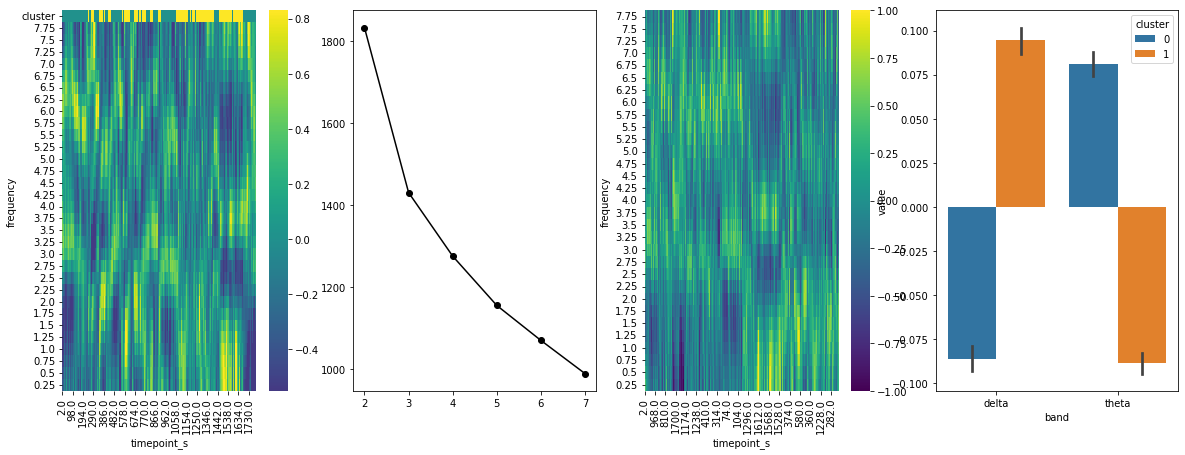

In [9]:
session = session_names[0]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "poor"

out[session] = clusters.assign(session_name = session)

ESHOCK_02


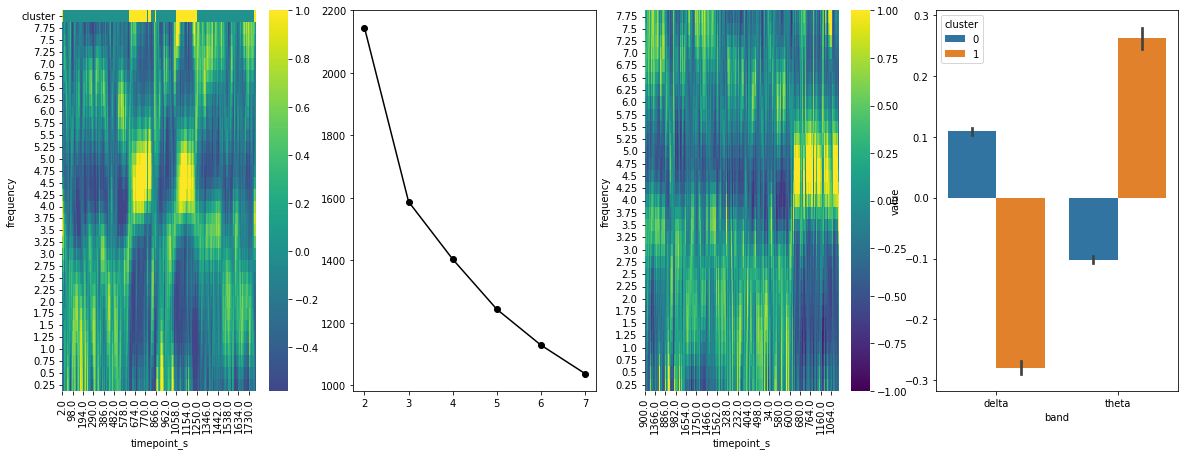

In [8]:
session = session_names[1]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

ESHOCK_03_LOC1


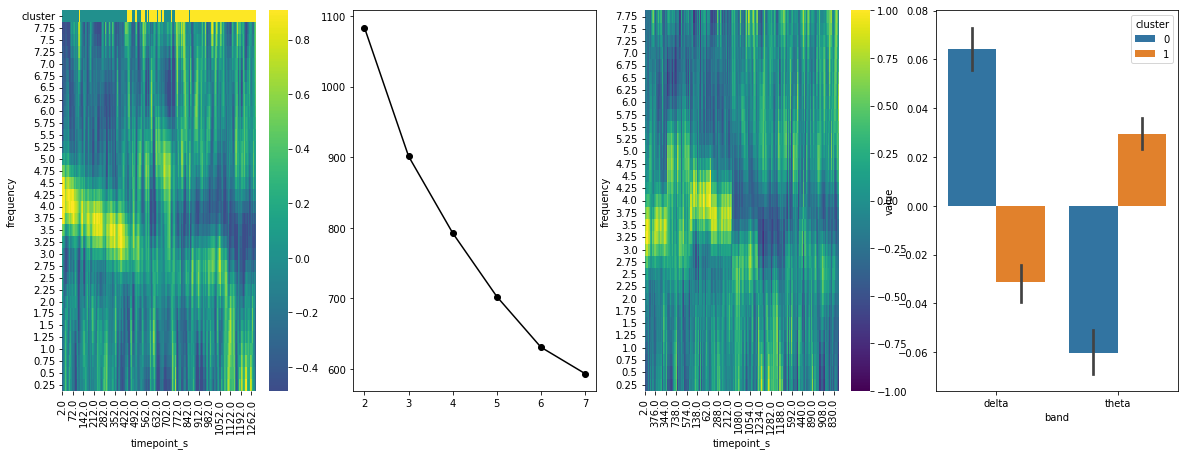

In [11]:
session = session_names[2]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "poor"

out[session] = clusters.assign(session_name = session)

ESHOCK_04_LOC1


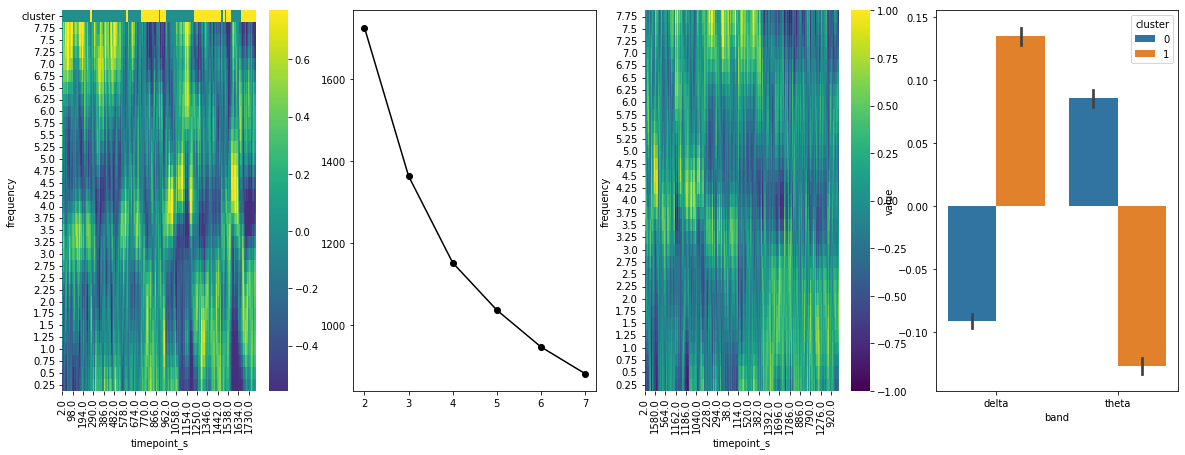

In [13]:
session = session_names[3]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

ESHOCK_06_LOC1


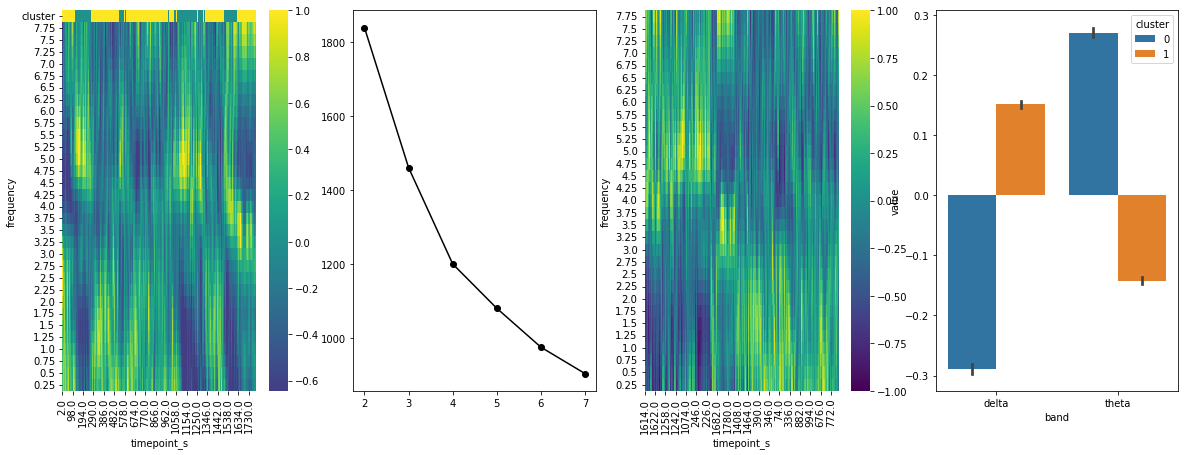

In [17]:
session = session_names[4]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

ESHOCK_07_LOC1


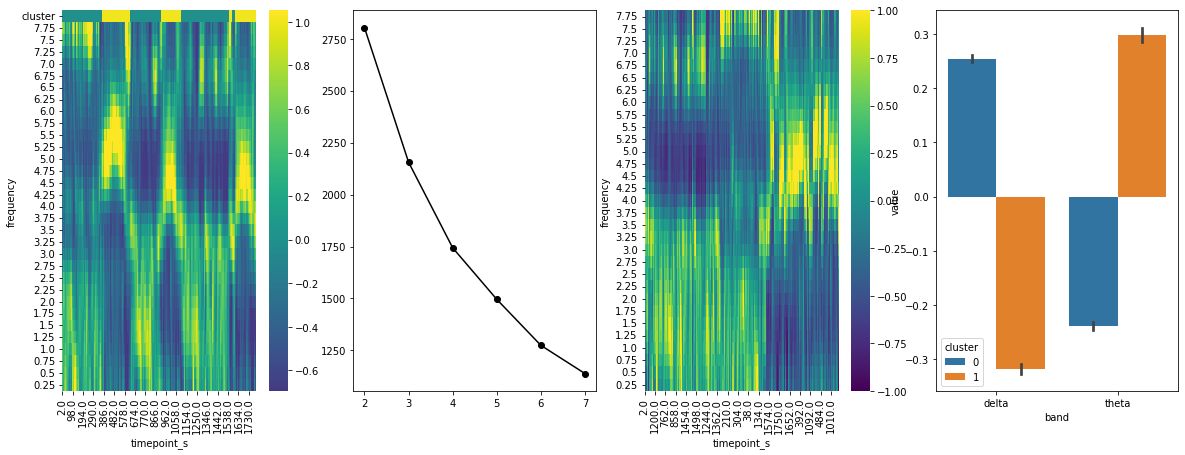

In [67]:
session = session_names[5]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

ESHOCK_08_LOC1


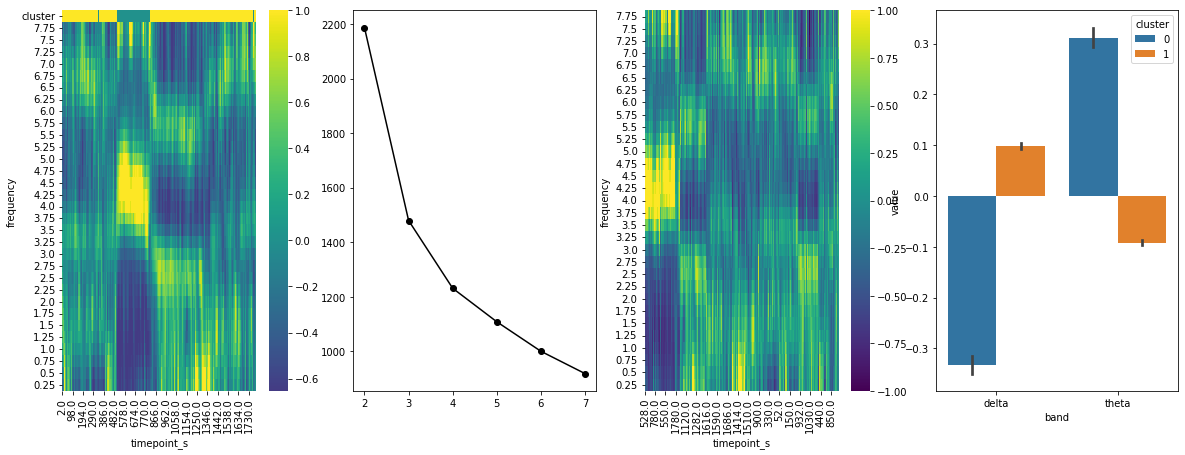

In [68]:
session = session_names[6]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

ESHOCK_09_LOC1


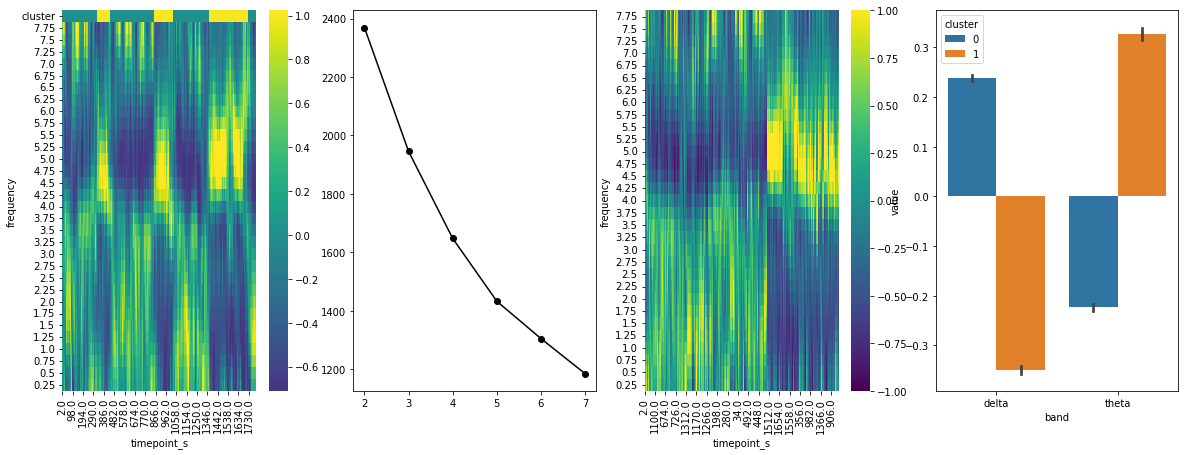

In [21]:
session = session_names[7]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"


out[session] = clusters.assign(session_name = session)

acute_01


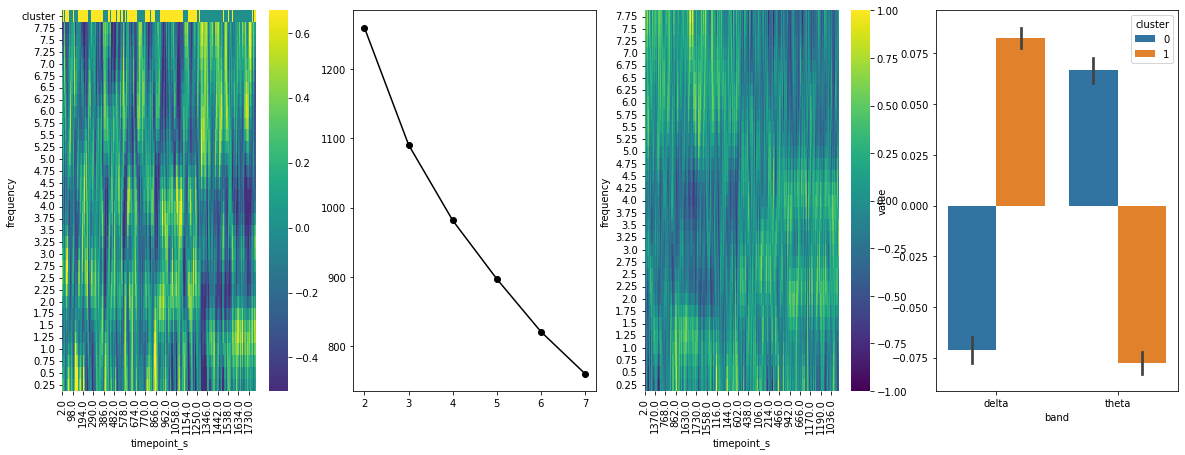

In [23]:
session = session_names[8]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "poor"


out[session] = clusters.assign(session_name = session)

acute_11


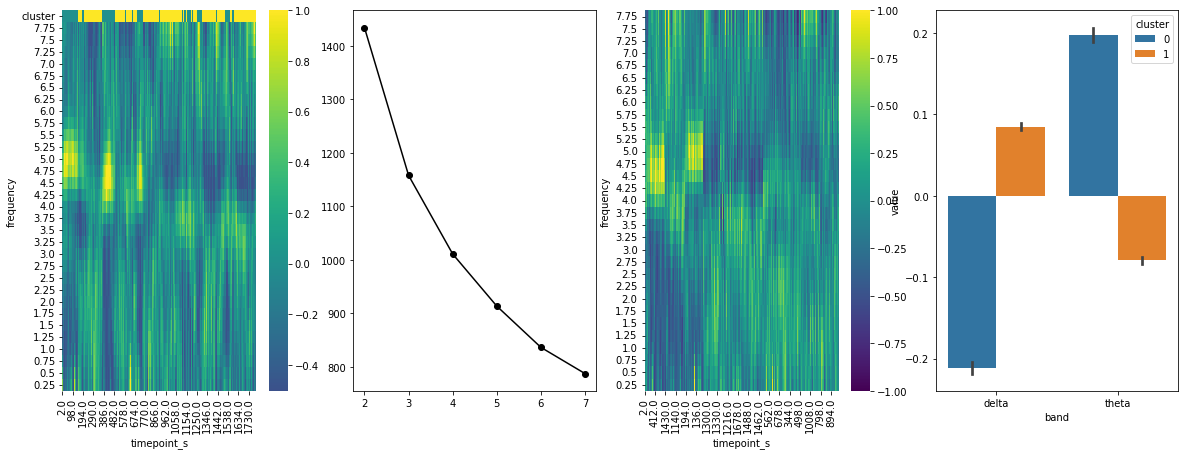

In [25]:
session = session_names[9]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_12


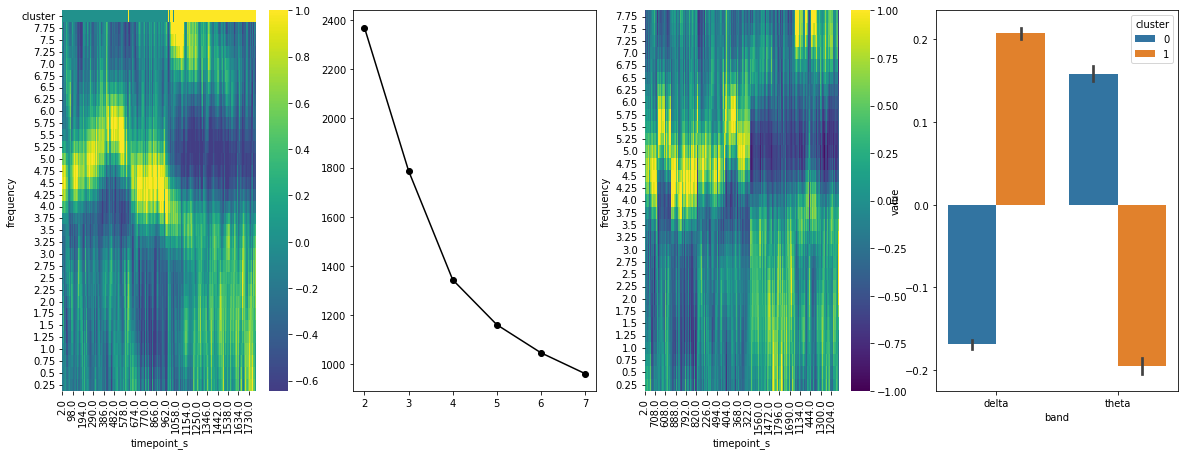

In [26]:
session = session_names[10]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_14


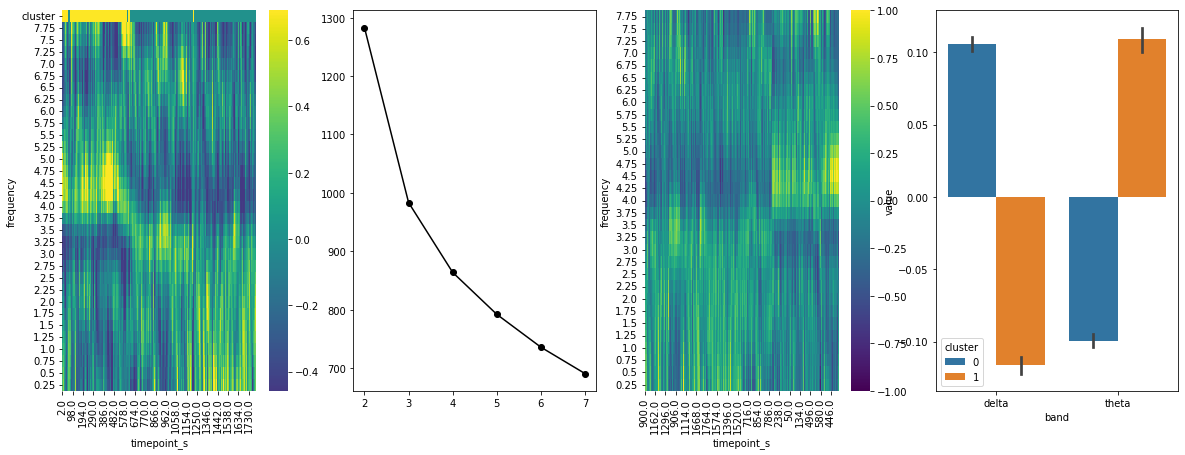

In [27]:
session = session_names[11]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

acute_15


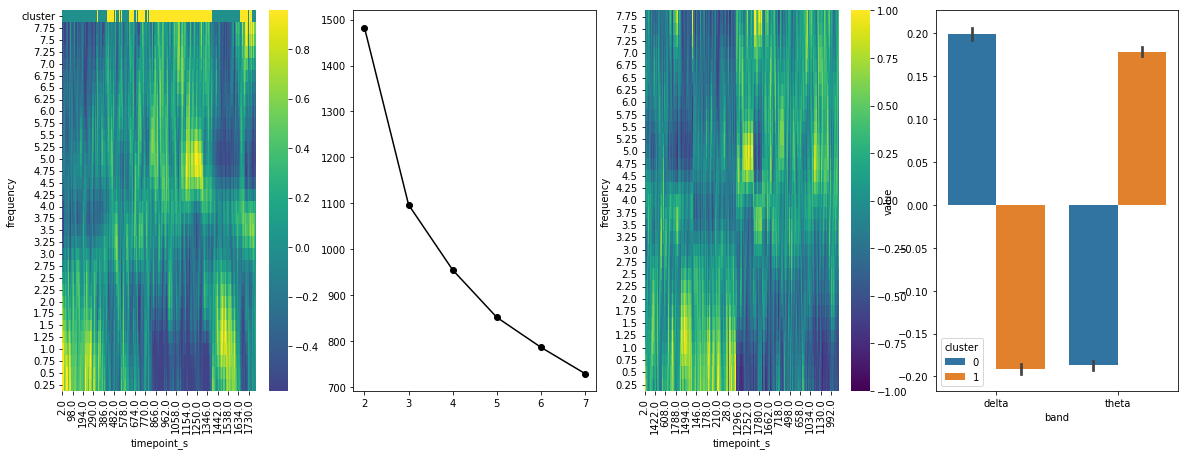

In [30]:
session = session_names[12]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

acute_16


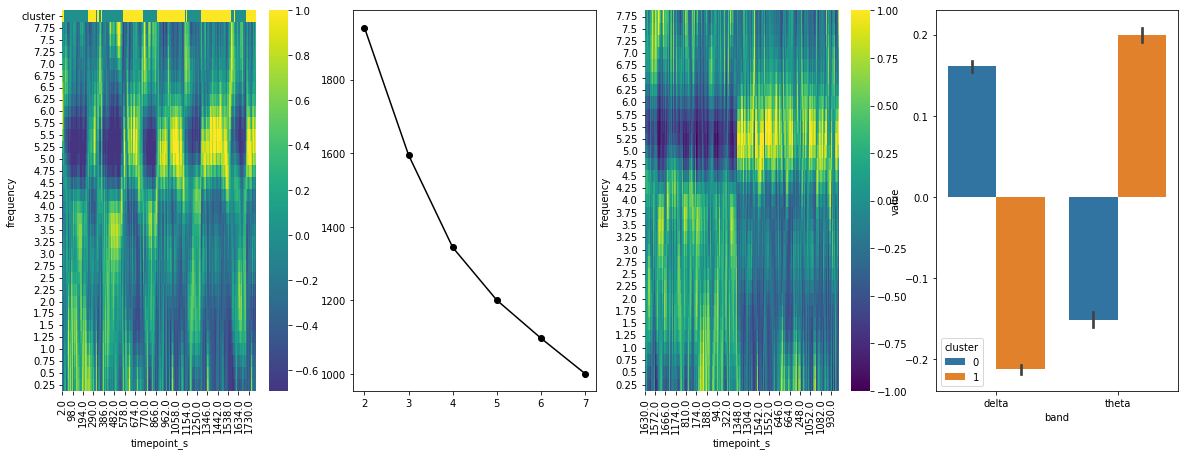

In [36]:
session = session_names[13]
print(session)

clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_03


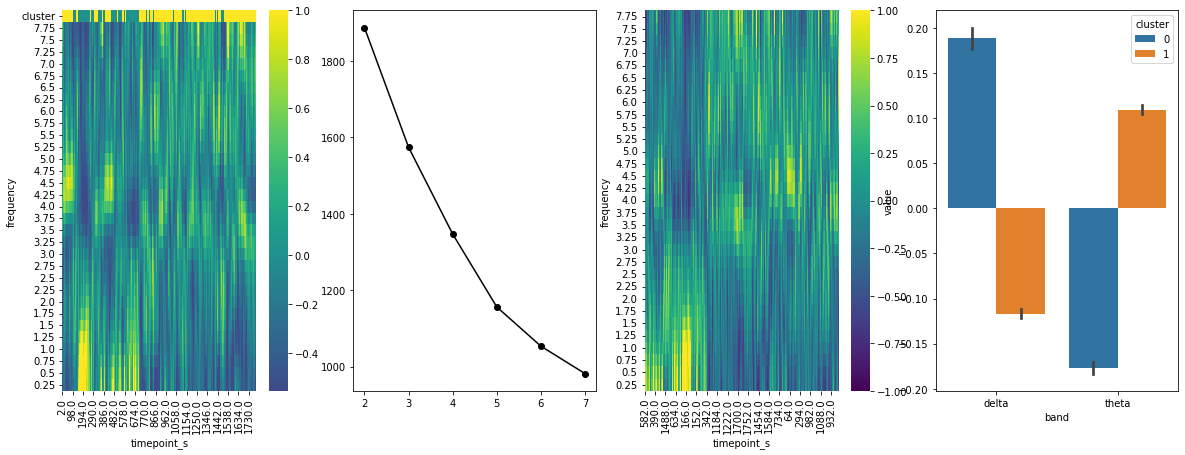

In [38]:
session = session_names[14]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)

clusters["quality"] = "med"


out[session] = clusters.assign(session_name = session)

hamilton_04


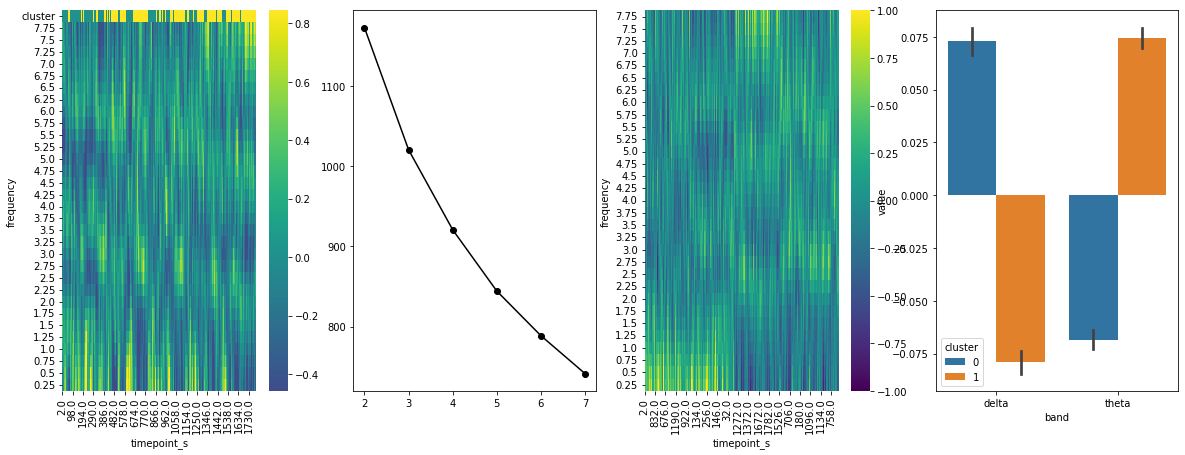

In [42]:
session = session_names[15]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

hamilton_09


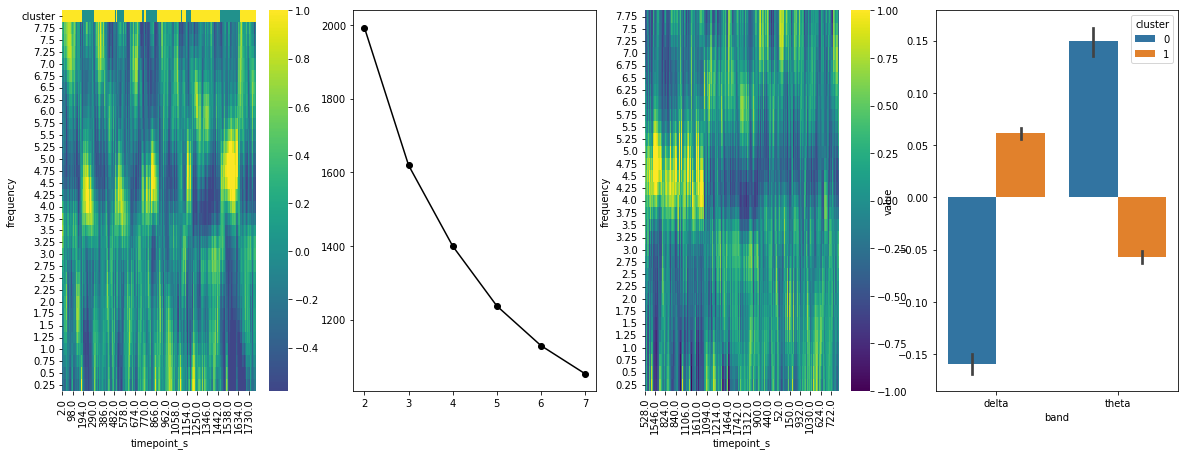

In [44]:
session = session_names[16]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_10


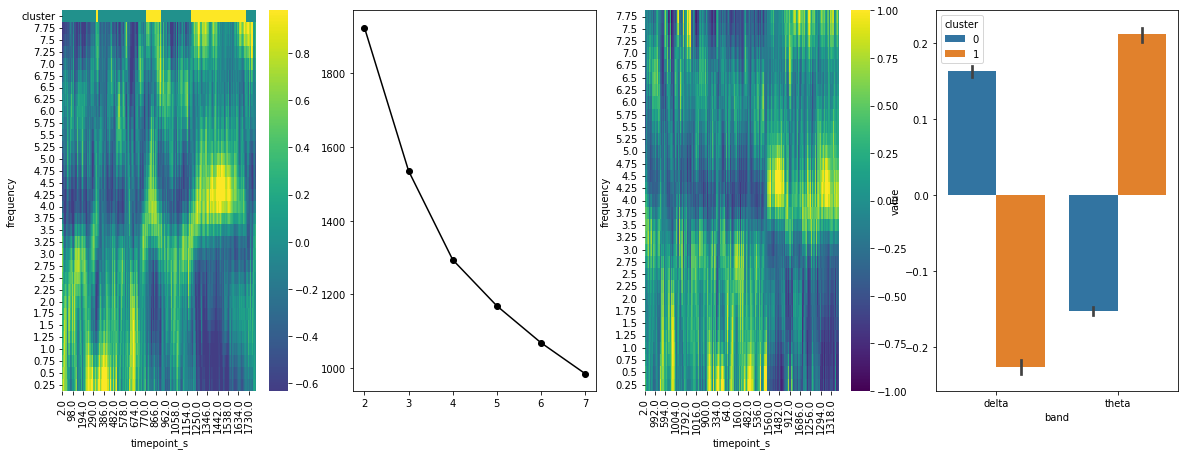

In [48]:
session = session_names[17]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_31


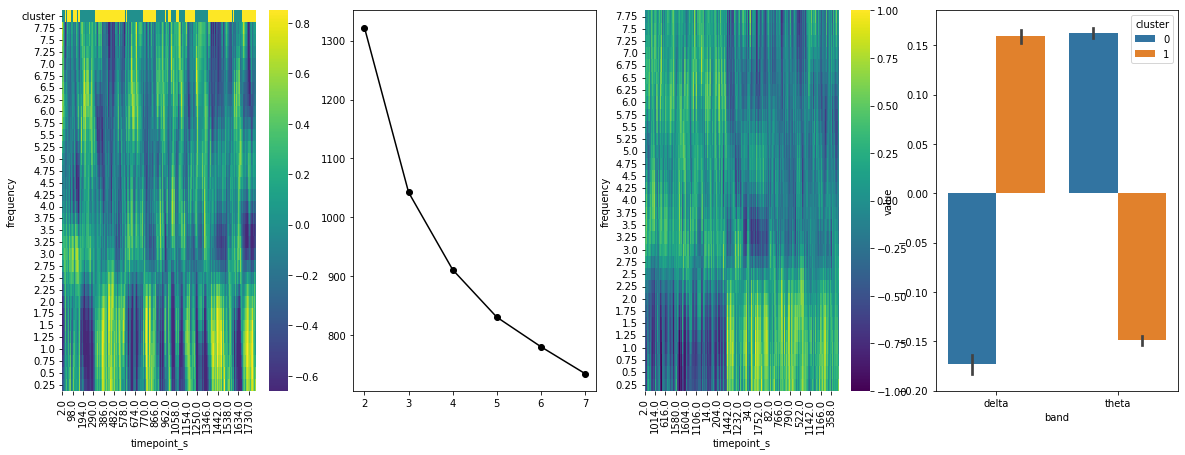

In [50]:
session = session_names[18]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "act", 1: "sw"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_32


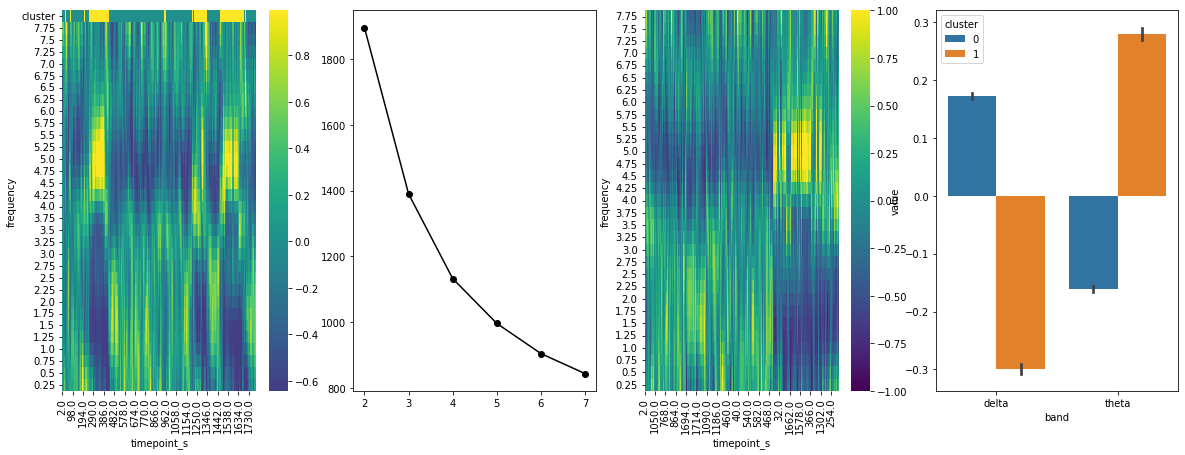

In [51]:
session = session_names[19]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_35


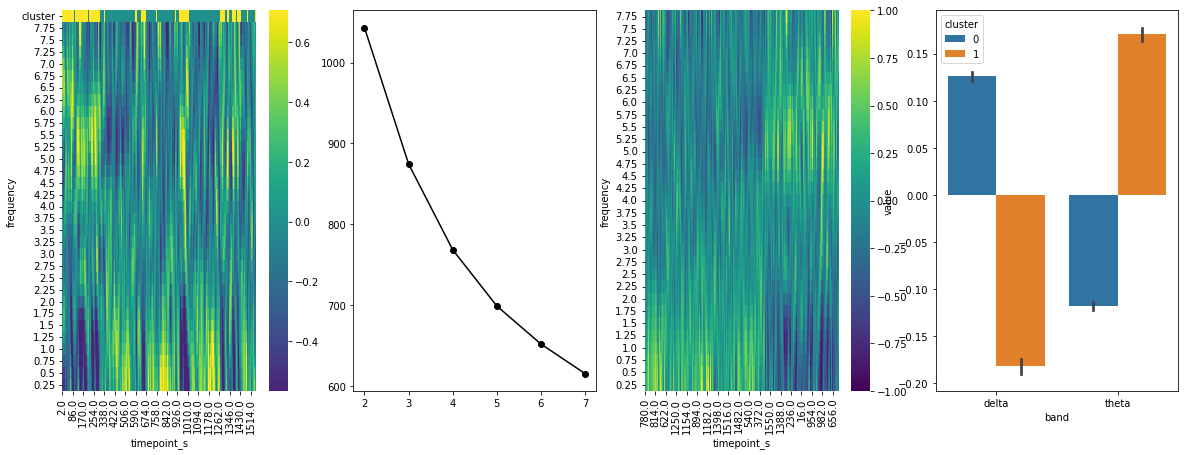

In [53]:
session = session_names[20]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "med"

out[session] = clusters.assign(session_name = session)

hamilton_36


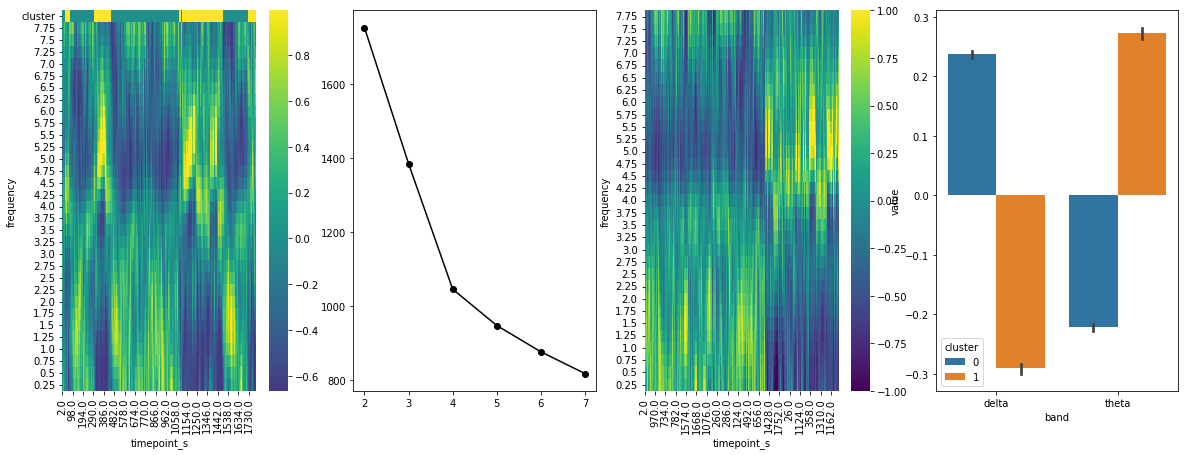

In [54]:
session = session_names[21]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_37


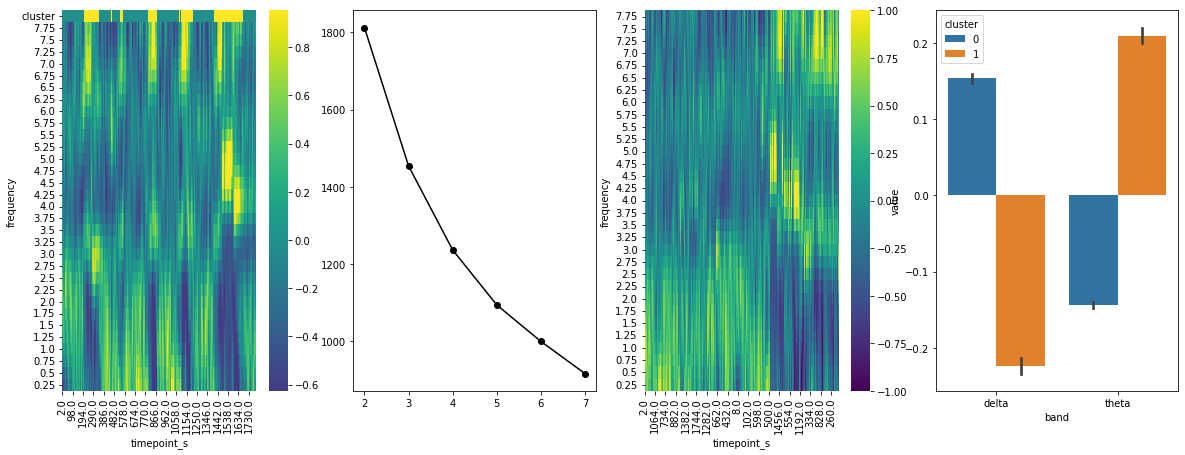

In [55]:
session = session_names[22]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

hamilton_38


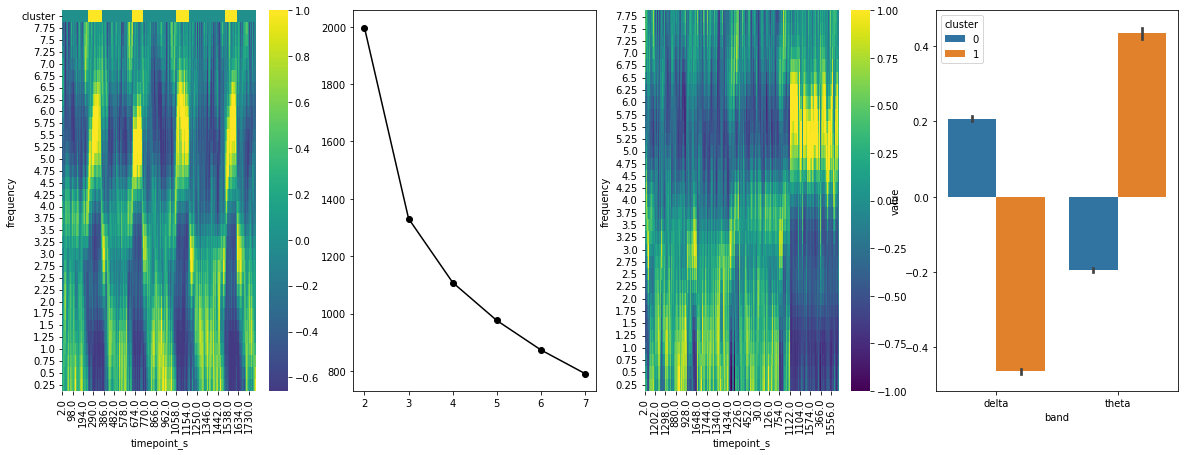

In [56]:
session = session_names[23]
print(session)


clusters = plot_session(df_fft, session, n_clusters=2)

mapper = {0: "sw", 1: "act"}
clusters["cluster"] = clusters["cluster"].map(mapper)
clusters["quality"] = "good"

out[session] = clusters.assign(session_name = session)

In [69]:
df_out = pd.concat([v for v in out.values()])

In [70]:
from drn_interactions.config import Config



df_out.assign(timepoint_s = lambda x: x.timepoint_s - 2).rename(columns=dict(cluster="state")).to_csv(Config.derived_data_dir / "lfp_states.csv", index=False)

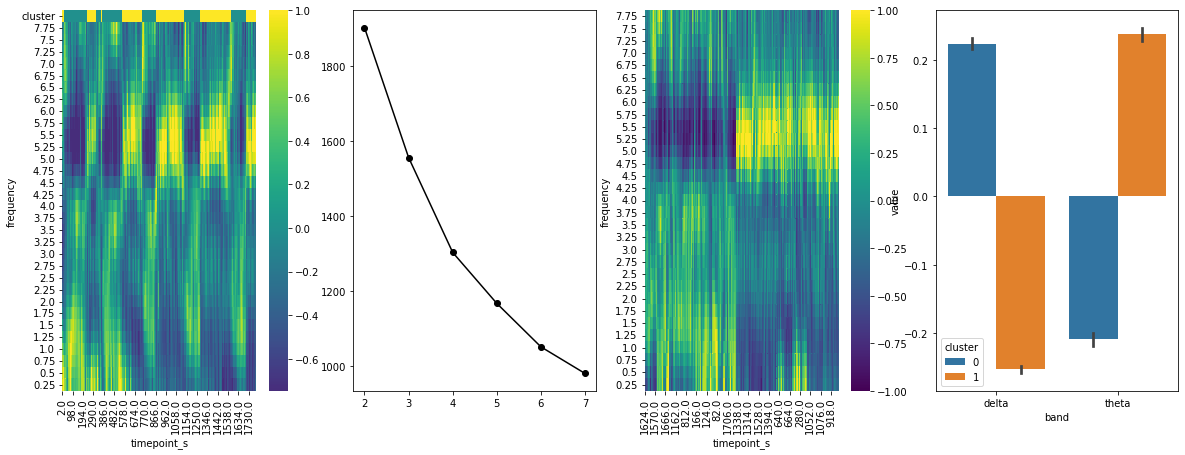

In [16]:
dfp, dfb = get_example(df_fft, session="acute_16")

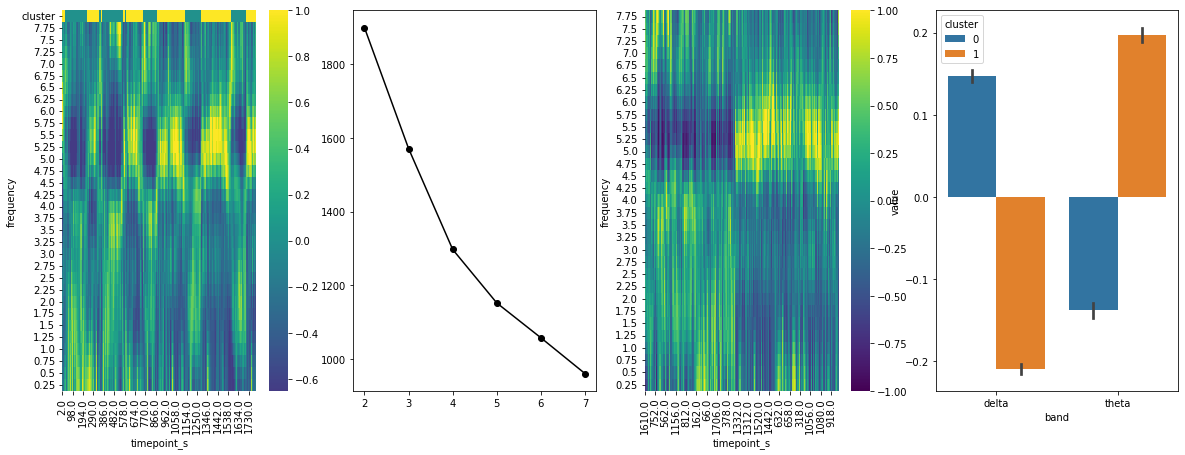

In [60]:
dfp, dfb = get_example(df_fft, session="acute_16")

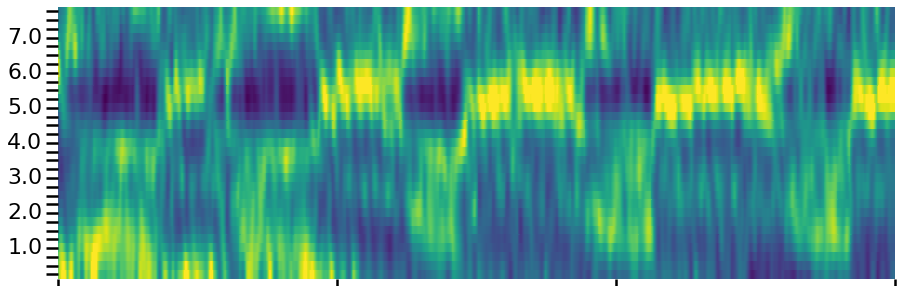

In [94]:
from drn_interactions.load import get_fig_dir
import matplotlib.ticker as ticker

sns.set_context("poster")
_, ax = plt.subplots(figsize=(15, 5))

vals = dfp.transpose().iloc[::-1]
idx = vals.index
ylabs = np.where(idx % 1 == 0, idx, "")
idx = vals.columns
idx = idx.values / 60

xlabs = np.where(idx % 10 == 0, idx, "")
sns.heatmap(vals, robust=False, cmap="viridis", vmin=-1, vmax=1, cbar=False, xticklabels=xlabs, yticklabels=ylabs)
_ = plt.yticks(rotation=0) 

ax.xaxis.set_major_locator(ticker.MultipleLocator(base=300))

ax.set_ylabel("")
ax.set_xlabel("")

plt.savefig(get_fig_dir() / "ephys_model" / "eeg_spec_example.png", dpi=300, transparent=True)

In [95]:
from drn_interactions.spikes import SpikesHandler

sh = SpikesHandler(block="pre", bin_width=1, session_names=["acute_16"])
df_spikes = sh.binned_piv.reset_index().assign(bin=lambda x: x.bin.divide(60)).set_index("bin").loc[lambda x: x.index <= 30]

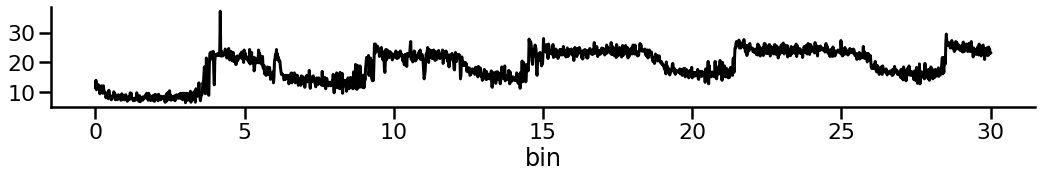

In [100]:
sns.set_context("poster")
vals = df_spikes.transpose().sum().divide(60).mul(10)
vals.plot(figsize=(15, 3), color="black")
sns.despine()
plt.tight_layout()
plt.savefig(get_fig_dir() / "ephys_model" / "eeg_popspikes_example.svg", dpi=300, transparent=True)

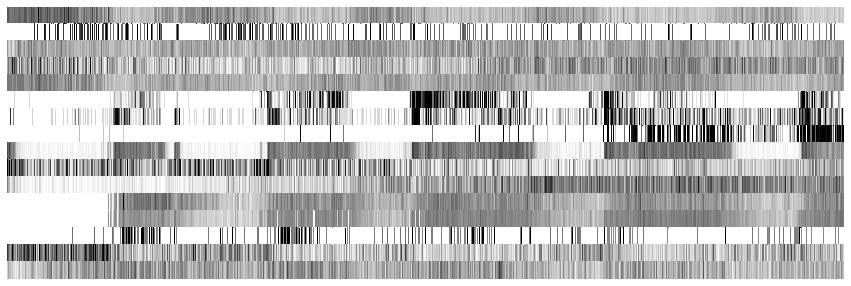

In [99]:
from sklearn.feature_extraction.text import TfidfTransformer
vals = df_spikes.transpose()
vals = TfidfTransformer().fit_transform(vals).toarray()

_, ax = plt.subplots(figsize=(15, 5))

sns.heatmap(vals, cmap="Greys", robust=True, xticklabels=False, yticklabels=False, cbar=False)
plt.savefig(get_fig_dir() / "ephys_model" / "eeg_spikes_example.png", dpi=300, transparent=True)